In [40]:
import pandas as pd
import matplotlib_inline
from sklearn import tree
import graphviz

matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

載入資料

In [41]:
df = pd.read_csv("marketing.csv")
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


Remove `Customer`.

In [42]:
df.drop(["Customer"], axis=1)

,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,Urban,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,Suburban,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,Suburban,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,Suburban,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


Encode yes and no to 1 and 0.

In [43]:
df["Response"] = df["Response"].map({
    "No": 0,
    "Yes": 1
})

分類前的資料處理與轉換，獨熱編碼

In [44]:
import pandas as pd

df_encode = pd.get_dummies(df)
df_encode

,Customer Lifetime Value,Response,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount,Customer_AA10041,...,Sales Channel_Web,Vehicle Class_Four-Door Car,Vehicle Class_Luxury Car,Vehicle Class_Luxury SUV,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car,Vehicle Size_Large,Vehicle Size_Medsize,Vehicle Size_Small
0,2763.519279,0,56274,69,32,5,0,1,384.811147,False,...,False,False,False,False,False,False,True,False,True,False
1,6979.535903,0,0,94,13,42,0,8,1131.464935,False,...,False,True,False,False,False,False,False,False,True,False
2,12887.431650,0,48767,108,18,38,0,2,566.472247,False,...,False,False,False,False,False,False,True,False,True,False
3,7645.861827,0,0,106,18,65,0,7,529.881344,False,...,False,False,False,False,True,False,False,False,True,False
4,2813.692575,0,43836,73,12,44,0,1,138.130879,False,...,False,True,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,23405.987980,0,71941,73,18,89,0,2,198.234764,False,...,True,True,False,False,False,False,False,False,True,False
9130,3096.511217,1,21604,79,14,28,0,1,379.200000,False,...,False,True,False,False,False,False,False,False,True,False
9131,8163.890428,0,0,85,9,37,3,2,790.784983,False,...,False,True,False,False,False,False,False,False,True,False
9132,7524.442436,0,21941,96,34,3,0,3,691.200000,False,...,False,True,False,False,False,False,False,True,False,False


定義 $X$, $y$. (Response)

In [45]:
X = df_encode.drop(columns=["Response"])
y = df_encode["Response"]

建立決策樹模型。

In [46]:
dt_model = tree.DecisionTreeClassifier(max_depth=(4))

dt_model.fit(X, y)

DecisionTreeClassifier(max_depth=4)

提取特徵重要性。

In [47]:
feature_importances = dt_model.feature_importances_
features = X.columns

將特徵重要性可視化。

In [48]:
# It takes too long. I commented it out.

# plt.figure(figsize=(8, 24))
# plt.barh(features, feature_importances, color="skyblue")
# plt.xlabel("Feature Importance")
# plt.ylabel("Features")
# plt.title("Feature Importance in Decision Tree Model")

產生影像的 dot 資料。

In [49]:
dot_data = tree.export_graphviz(
    dt_model,
    feature_names=X.columns.to_list(),
    class_names=['0', '1'],
    filled=True,
    rounded=True,
    special_characters=(True),
)

建立 Graphviz 物件並顯示。

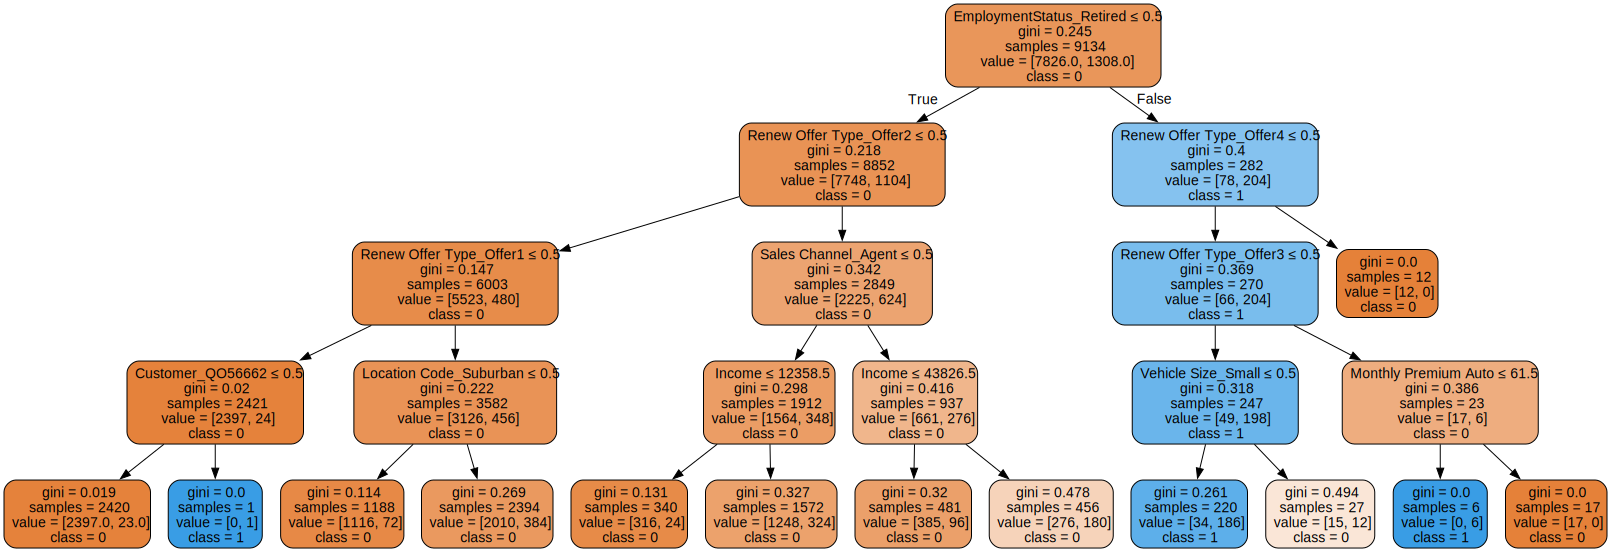

In [50]:
graph = graphviz.Source(dot_data)
graph.render("decision_tree", format="png")
graph